In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#set file path
file = Path("../Resources/Clean_Tobacco_data.csv")

In [3]:
#read csv file
tob = pd.read_csv(file)

In [4]:
#drop any empty columns
tob_df = tob.dropna().reset_index(drop=True)

In [5]:
tobacco = tob_df.copy()
tobacco.head()

,Unnamed: 0,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Sample_Size,Gender,Race,Age
0,1,2019,New Hampshire,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,357.0,Female,All Races,All Ages
1,4,2019,Alabama,Smokeless Tobacco Use (Adults),User Status,Not Current,88.6,2729.0,Male,All Races,All Ages
2,5,2019,New Hampshire,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,55.2,82.0,Overall,All Races,All Ages
3,6,2019,South Carolina,Cigarette Use (Adults),Smoking Status,Current,15.8,3761.0,Female,All Races,All Ages
4,8,2019,Michigan,Cigarette Use (Adults),Smoking Status,Current,17.2,5662.0,Female,All Races,All Ages


In [6]:
# drop columns that are not needed
tobacco.drop(["Unnamed: 0", "YEAR","LocationDesc","Data_Value","Race","Age"], axis=1, inplace=True)


In [7]:
tobacco.head()

,TopicDesc,MeasureDesc,Response,Sample_Size,Gender
0,Cigarette Use (Adults),Smoking Frequency,Every Day,357.0,Female
1,Smokeless Tobacco Use (Adults),User Status,Not Current,2729.0,Male
2,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,82.0,Overall
3,Cigarette Use (Adults),Smoking Status,Current,3761.0,Female
4,Cigarette Use (Adults),Smoking Status,Current,5662.0,Female


In [8]:
# Create individual dataframes filtered by gender
male_df = tobacco[(tobacco.Gender == "Male") & (tobacco.Gender != "Overall")]
female_df = tobacco[(tobacco.Gender == "Female") & (tobacco.Gender != "Overall")]
both_df = tobacco[(tobacco.Gender == "Male") | (tobacco.Gender == "Female")]

In [9]:
# Group by tobacco type
female_df = female_df.groupby("TopicDesc")
male_df = male_df.groupby("TopicDesc")
both_df = both_df.groupby("TopicDesc")

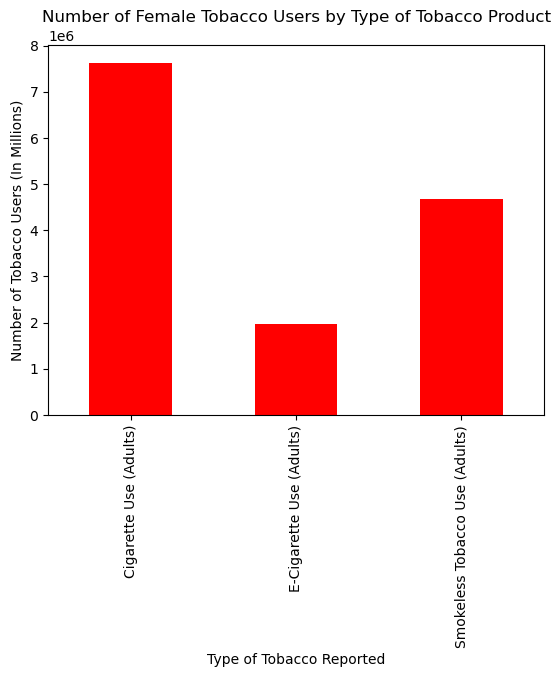

In [10]:
# plot bar chart for females reported only
female_count = female_df["Sample_Size"].sum().plot.bar(width=0.5, color="red")
female_count.set_xlabel("Type of Tobacco Reported")
female_count.set_ylabel("Number of Tobacco Users (In Millions)")
female_count.set_title("Number of Female Tobacco Users by Type of Tobacco Product")
plt.xticks(rotation=90)
plt.savefig("output_data/AR_Fig1.png")

In total, there were 7.6 million cigarette smokers, 4.7 million smokeless tobacco users, and just under 2 million e-cigarette users. There were more women reported as cigarette smokers than in any category of men by 2 million people. 

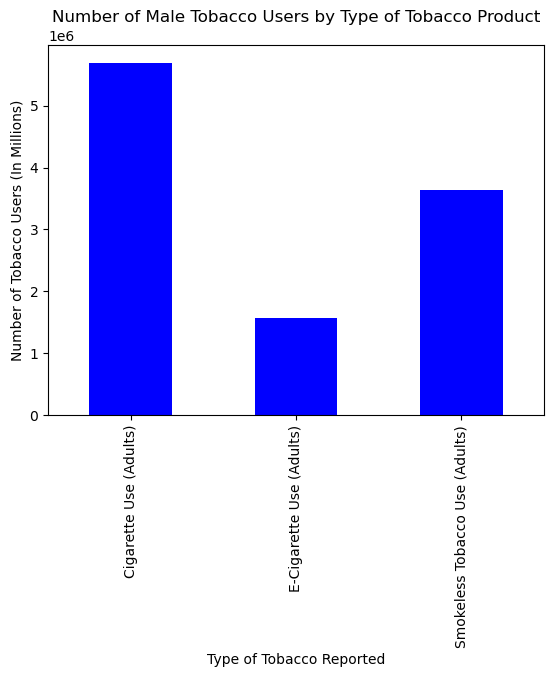

In [11]:
# plot bar chart for males reported only 
male_count = male_df["Sample_Size"].sum().plot.bar(width=0.5, color="blue")
male_count.set_xlabel("Type of Tobacco Reported")
male_count.set_ylabel("Number of Tobacco Users (In Millions)")
male_count.set_title("Number of Male Tobacco Users by Type of Tobacco Product")
plt.savefig("output_data/AR_Fig2.png")

For the men reported in this data set, there were just over 5.6 million cigarette smokers, 3.6 million smokeless tobacco users, and 1.6 million e-cigarette smokers. Cigarettes are very clearly more popular amongst men than other types of tobacco. 

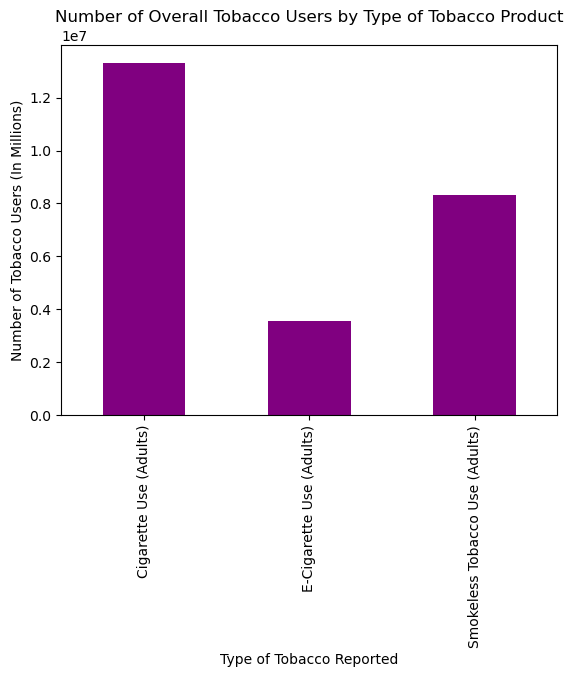

In [12]:
# plot for both males and females reported
both_count = both_df["Sample_Size"].sum().plot.bar(width=0.5, color = "purple")
both_count.set_xlabel("Type of Tobacco Reported")
both_count.set_ylabel("Number of Tobacco Users (In Millions)")
both_count.set_title("Number of Overall Tobacco Users by Type of Tobacco Product")
plt.savefig("output_data/AR_Fig3.png")

Overall, cigarettes are the most widely used form of tobacco between both genders. There were just over 13 million cigarette smokers reported throughout the US. 

In [13]:
# to see actual numbers calculated, find the sum of each tobacco use for each gendered dataframe
male_df["Sample_Size"].sum()

TopicDesc
Cigarette Use (Adults)            5690467.0
E-Cigarette Use (Adults)          1563483.0
Smokeless Tobacco Use (Adults)    3643276.0
Name: Sample_Size, dtype: float64

In [14]:
female_df["Sample_Size"].sum()

TopicDesc
Cigarette Use (Adults)            7625647.0
E-Cigarette Use (Adults)          1976093.0
Smokeless Tobacco Use (Adults)    4681488.0
Name: Sample_Size, dtype: float64

In [15]:
both_df["Sample_Size"].sum()

TopicDesc
Cigarette Use (Adults)            13316114.0
E-Cigarette Use (Adults)           3539576.0
Smokeless Tobacco Use (Adults)     8324764.0
Name: Sample_Size, dtype: float64

The original question was to show the differences of tobacco use by gender. From my analysis, you can see that while overall there were more women reported to currently or previously smoked, there was not a trend difference in the popularity of specific tobacco types. Cigarettes were the most commonly reported as used, then smokeless tobacco, then e-cigarettes. In general, from the data in this dataset you can conclude that more women smoke than men. 